In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import math
import random

# ***Link Prediction***
------------------

In [2]:
# Given a fixed network, can we predict how this network will look in future? 
# Link prediction - given a network, which links are to be formed in future?
# e.g. a friend reccommendation algorithm for a social network!

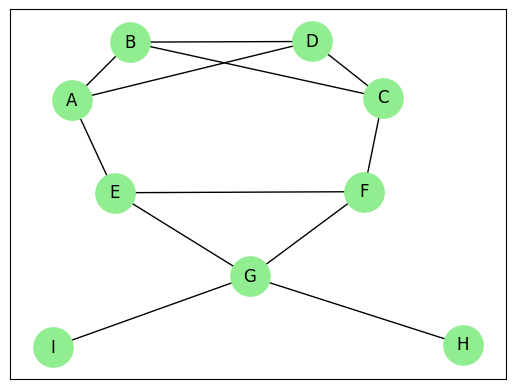

In [19]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("A", "D"), ("B", "C"), ("B", "D"), ("D", "C"), ("A", "E"), ("C", "F"), ("E", "F"), ("E", "G"), ("F", "G"),
                     ("G", "H"), ("G", "I")])
nx.draw_networkx(graph, node_color = "lightgreen", node_size = 800)
# plt.savefig("link_prediction.svg", format = "svg", dpi = 500)

## **Triadic closure**

In [20]:
# Measure 1
# number of common neighbours of node 1 and node 2

# common_neighbours(x, y) = |N(x) ∩ N(y)|
# cardinality of the interesect of x's neighbours and y's neighbours.

In [21]:
# common_neighbours(A, C) = |{B, D}| = 2

In [22]:
list(itertools.permutations(graph.nodes(), r = 2))

[('A', 'B'),
 ('A', 'D'),
 ('A', 'C'),
 ('A', 'E'),
 ('A', 'F'),
 ('A', 'G'),
 ('A', 'H'),
 ('A', 'I'),
 ('B', 'A'),
 ('B', 'D'),
 ('B', 'C'),
 ('B', 'E'),
 ('B', 'F'),
 ('B', 'G'),
 ('B', 'H'),
 ('B', 'I'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'E'),
 ('D', 'F'),
 ('D', 'G'),
 ('D', 'H'),
 ('D', 'I'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('C', 'E'),
 ('C', 'F'),
 ('C', 'G'),
 ('C', 'H'),
 ('C', 'I'),
 ('E', 'A'),
 ('E', 'B'),
 ('E', 'D'),
 ('E', 'C'),
 ('E', 'F'),
 ('E', 'G'),
 ('E', 'H'),
 ('E', 'I'),
 ('F', 'A'),
 ('F', 'B'),
 ('F', 'D'),
 ('F', 'C'),
 ('F', 'E'),
 ('F', 'G'),
 ('F', 'H'),
 ('F', 'I'),
 ('G', 'A'),
 ('G', 'B'),
 ('G', 'D'),
 ('G', 'C'),
 ('G', 'E'),
 ('G', 'F'),
 ('G', 'H'),
 ('G', 'I'),
 ('H', 'A'),
 ('H', 'B'),
 ('H', 'D'),
 ('H', 'C'),
 ('H', 'E'),
 ('H', 'F'),
 ('H', 'G'),
 ('H', 'I'),
 ('I', 'A'),
 ('I', 'B'),
 ('I', 'D'),
 ('I', 'C'),
 ('I', 'E'),
 ('I', 'F'),
 ('I', 'G'),
 ('I', 'H')]

In [23]:
pairs = list()

for perm in itertools.permutations(graph.nodes(), r = 2):
    if (perm[0] != perm[1]) & (reversed(tuple(perm)) not in pairs):
        pairs.append(perm)

In [24]:
pairs[:10]

[('A', 'B'),
 ('A', 'D'),
 ('A', 'C'),
 ('A', 'E'),
 ('A', 'F'),
 ('A', 'G'),
 ('A', 'H'),
 ('A', 'I'),
 ('B', 'A'),
 ('B', 'D')]

In [25]:
def sort_dict_by_values(dictionary: dict) -> list:
    return sorted([item for item in dictionary.items()], reverse = True, key = lambda tup: tup[1])

In [26]:
cneigh = {(node_1, node_2): len(list(nx.common_neighbors(graph, node_1, node_2))) for (node_1, node_2) in nx.non_edges(graph)}

sort_dict_by_values(cneigh)

[(('A', 'C'), 2),
 (('A', 'G'), 1),
 (('A', 'F'), 1),
 (('B', 'E'), 1),
 (('B', 'F'), 1),
 (('C', 'E'), 1),
 (('C', 'G'), 1),
 (('H', 'E'), 1),
 (('H', 'F'), 1),
 (('H', 'I'), 1),
 (('I', 'E'), 1),
 (('I', 'F'), 1),
 (('D', 'E'), 1),
 (('D', 'F'), 1),
 (('A', 'I'), 0),
 (('A', 'H'), 0),
 (('B', 'I'), 0),
 (('B', 'H'), 0),
 (('B', 'G'), 0),
 (('C', 'H'), 0),
 (('C', 'I'), 0),
 (('H', 'D'), 0),
 (('I', 'D'), 0),
 (('D', 'G'), 0)]

# **Jaccard Coefficient**

In [27]:
# Looks at the number of common neighbours but normalizes by the total neighbours

# ***Jacc coef(x, y) = $\frac{|N(x) \cap N(y)|}{|N(x) \cup N(y)|}$***

In [28]:
# jacc_coeff(A, C) = |{B, D}| / |{B, D, E, F}|
# exclude the two select nodes.
# 0.5

sorted(nx.jaccard_coefficient(graph), reverse = True, key = lambda tup: tup[2])

[('H', 'I', 1.0),
 ('A', 'C', 0.5),
 ('H', 'E', 0.3333333333333333),
 ('H', 'F', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333),
 ('I', 'F', 0.3333333333333333),
 ('A', 'F', 0.2),
 ('B', 'E', 0.2),
 ('B', 'F', 0.2),
 ('C', 'E', 0.2),
 ('D', 'E', 0.2),
 ('D', 'F', 0.2),
 ('A', 'G', 0.16666666666666666),
 ('C', 'G', 0.16666666666666666),
 ('A', 'I', 0.0),
 ('A', 'H', 0.0),
 ('B', 'I', 0.0),
 ('B', 'H', 0.0),
 ('B', 'G', 0.0),
 ('C', 'H', 0.0),
 ('C', 'I', 0.0),
 ('H', 'D', 0.0),
 ('I', 'D', 0.0),
 ('D', 'G', 0.0)]

In [29]:
# Nodes H and I have the highest Jaccard's coefficient since they have a single neighbour who also common for them

## **Resource Allocation**

In [30]:
# Defined as the fraction of a resources of a node that it can send to another through its common neighbours.

# ***Res alloc(x, y) = $\sum_{u \in (N(x) \cap N(y))}{\frac{1}{|deg(u)|}}$***

![img](link_prediction.svg)

In [31]:
# that is the sum of 1/degree of node for all nodes that are common neighbours to the given pair of nodes.

In [32]:
# Say that nodes X and Y have lots of common neighbours
# they'll have a fairly large resource allocation index
# if these common nodes also have small degree (the denominator) they will have an even larger resource allocation index!

In [33]:
# Say that nodes X and Y have just one common neighbour Z
# X wants to send Y a unit of information
# X hopes to send this information to Y by passing it to Z, assuming Z will pass it along to Y
# However, Z cannot just give the received information to Y
# It is obliged to divide it equally among its neighbours

# The larger the Z's degree the smaller the information received by Y
# Resource allocation index penalizes nodes that have common neighbours who have high degrees.

In [34]:
# resource alocation index(A, C) = 1 / deg(B) + 1 / deg(D)
# = 1/3 + 1/3
# = 2/3

In [35]:
sorted(nx.resource_allocation_index(graph), reverse = True, key = lambda tup: tup[2])

[('A', 'C', 0.6666666666666666),
 ('A', 'G', 0.3333333333333333),
 ('A', 'F', 0.3333333333333333),
 ('B', 'E', 0.3333333333333333),
 ('B', 'F', 0.3333333333333333),
 ('C', 'E', 0.3333333333333333),
 ('C', 'G', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('H', 'E', 0.25),
 ('H', 'F', 0.25),
 ('H', 'I', 0.25),
 ('I', 'E', 0.25),
 ('I', 'F', 0.25),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## **Adamic-Adar Index**

In [36]:
# This is very similar to resource allocation index but instead of dividing 1 by the degree of node, it divides 1 by the log of degree of node.

# ***Res alloc(x, y) = $\sum_{u \in (N(x) \cup N(y))}{\frac{1}{log(|deg(u)|)}}$***

In [37]:
# adamic-adar(A, C) = 1 / log(deg(B)) + 1 / log(deg(D))
# = 1/log(3) + 1/log(3)

2 * (1 / math.log(3))

1.8204784532536746

In [38]:
sorted(nx.adamic_adar_index(graph), reverse = True, key = lambda tup: tup[2])

[('A', 'C', 1.8204784532536746),
 ('A', 'G', 0.9102392266268373),
 ('A', 'F', 0.9102392266268373),
 ('B', 'E', 0.9102392266268373),
 ('B', 'F', 0.9102392266268373),
 ('C', 'E', 0.9102392266268373),
 ('C', 'G', 0.9102392266268373),
 ('D', 'E', 0.9102392266268373),
 ('D', 'F', 0.9102392266268373),
 ('H', 'E', 0.7213475204444817),
 ('H', 'F', 0.7213475204444817),
 ('H', 'I', 0.7213475204444817),
 ('I', 'E', 0.7213475204444817),
 ('I', 'F', 0.7213475204444817),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## **Preferential Attachment Score**

In [39]:
# Nodes that have very high degrees are likely to get more neighbours.
# In a pir of nodes, if each have a high degree, they have a high chance to become connected in future.

# ***Preferential score(x, y) = $|N(x)||N(y)|$***

In [41]:
# pref attach(A, C) = deg(A) * deg(C)
# = 3 * 3 
# = 9

graph.degree("A") * graph.degree("C")

9

In [42]:
sorted(nx.preferential_attachment(graph), reverse = True, key = lambda tup: tup[2])

[('A', 'G', 12),
 ('B', 'G', 12),
 ('C', 'G', 12),
 ('D', 'G', 12),
 ('A', 'C', 9),
 ('A', 'F', 9),
 ('B', 'E', 9),
 ('B', 'F', 9),
 ('C', 'E', 9),
 ('D', 'E', 9),
 ('D', 'F', 9),
 ('A', 'I', 3),
 ('A', 'H', 3),
 ('B', 'I', 3),
 ('B', 'H', 3),
 ('C', 'H', 3),
 ('C', 'I', 3),
 ('H', 'E', 3),
 ('H', 'F', 3),
 ('H', 'D', 3),
 ('I', 'E', 3),
 ('I', 'F', 3),
 ('I', 'D', 3),
 ('H', 'I', 1)]

# ***Measures that take the community structure of the networks into account***

In [43]:
# If a network is a company, each department may form communities
# Assumes that if two nodes belong to same community and have many neighbours who also belong to the same community,
# they are more likely to form an edge than two nodes with neighbours from different communities.

# ***Community Common Neighbours***

In [44]:
# This is a modified version of common neighbours method which gives a bonus if the neighbours are from the same community
# This method is also known as the Soundrarajan and Hopcroft method.

# ***Community common neighbours(x, y) = $|N(x) \cap N(y)| + \sum_{u \in (N(x) \cap N(y))}{f(u)}$***

In [45]:
# Where f(u) = 1, if u is in the same community as x and y
# f(u) = 0, if not.

In [46]:
# Assume A, B, C & D are from the same community
# Soundrarajan Hopcroft(A, C) = \{B, D}\+ 2
# = 2 + 2
# = 4

In [56]:
# First we need to tell NetworkX which community each node belongs to.

comm = ["Sane", "Insane"]

for node in graph.nodes():
    graph.nodes[node]["community"] = random.choice(comm)

In [57]:
nx.get_node_attributes(graph, "community")

{'A': 'Sane',
 'B': 'Sane',
 'D': 'Sane',
 'C': 'Insane',
 'E': 'Insane',
 'F': 'Sane',
 'G': 'Insane',
 'H': 'Insane',
 'I': 'Insane'}

In [58]:
sorted(nx.cn_soundarajan_hopcroft(graph), reverse = True, key = lambda tup: tup[2])

[('A', 'C', 2),
 ('H', 'E', 2),
 ('H', 'I', 2),
 ('I', 'E', 2),
 ('A', 'G', 1),
 ('A', 'F', 1),
 ('B', 'E', 1),
 ('B', 'F', 1),
 ('C', 'E', 1),
 ('C', 'G', 1),
 ('H', 'F', 1),
 ('I', 'F', 1),
 ('D', 'E', 1),
 ('D', 'F', 1),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('C', 'H', 0),
 ('C', 'I', 0),
 ('H', 'D', 0),
 ('I', 'D', 0),
 ('D', 'G', 0)]

## ***Community Resource Allocation***

In [60]:
# Similar to resource alocation method, but considers only the nodes in the same community for neighbours.
# Also known as Soundrarajan Hopcroft Resource alocation score
# Instead of summing f(u), here we sum the f(u) divided by degree of node u.

# ***Community Resource Allocation(x, y) = $\sum_{u \in (N(x) \cap N(y))}{\frac{f(u)}{|N(u)|}}$***

In [61]:
# Assume A, B, C & D all are from the same community
# Community Resource Score(A, C) = 1 / 3 + 1 / 3
# = 2/3

# ***deg(node) = |N(node)|***

In [62]:
sorted(nx.ra_index_soundarajan_hopcroft(graph), reverse = True, key = lambda tup: tup[2])

[('H', 'E', 0.25),
 ('H', 'I', 0.25),
 ('I', 'E', 0.25),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('A', 'C', 0),
 ('A', 'G', 0),
 ('A', 'F', 0),
 ('B', 'I', 0),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('B', 'E', 0),
 ('B', 'F', 0),
 ('C', 'H', 0),
 ('C', 'E', 0),
 ('C', 'G', 0),
 ('C', 'I', 0),
 ('H', 'F', 0),
 ('H', 'D', 0),
 ('I', 'F', 0),
 ('I', 'D', 0),
 ('D', 'G', 0),
 ('D', 'E', 0),
 ('D', 'F', 0)]